In [13]:
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler, LabelBinarizer

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [15]:
letters = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'K',
    10: 'L',
    11: 'M',
    12: 'N',
    13: 'O',
    14: 'P',
    15: 'Q',
    16: 'R',
    17: 'S',
    18: 'T',
    19: 'U',
    20: 'V',
    21: 'W',
    22: 'X',
    23: 'Y'
}

In [2]:
def get_data():
    """Returns the data as a pandas dataframe"""
    try:
        df = pd.read_csv('training_data/sign_mnist_train.csv')
    except:
        df = pd.read_csv(r'HandsignInterpreter\training_data\sign_mnist_train.csv')
    return df

def get_test_data():
    """Returns the data as a pandas dataframe"""
    try:
        df = pd.read_csv('training_data/sign_mnist_test.csv')
    except:
        df = pd.read_csv(r'HandsignInterpreter\training_data\sign_mnist_test.csv')
    return df

In [3]:
df = get_data()
df_test = get_test_data()
classes_train = df['label']
classes_test = df_test['label']
del df['label']
del df_test['label']

label_binarizer = LabelBinarizer()
classes_train = label_binarizer.fit_transform(classes_train)
classes_test = label_binarizer.fit_transform(classes_test)

vector_train = df.values
vector_test = df_test.values
vector_train = vector_train / 255
vector_test = vector_test / 255
vector_train = vector_train.reshape(-1, 28, 28, 1)
vector_test = vector_test.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(vector_train)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(vector_train, classes_train, batch_size = 128), epochs = 20, validation_data = (vector_test, classes_test), callbacks = [learning_rate_reduction])
print("Accuracy of the model is - " , model.evaluate(vector_test, classes_test)[1]*100 , "%")    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

2022-12-19 14:50:44.367116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
215/215 [==============================] - 31s 141ms/step - loss: 1.0394 - accuracy: 0.6719 - val_loss: 3.4429 - val_accuracy: 0.2163 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 31s 146ms/step - loss: 0.2292 - accuracy: 0.9238 - val_loss: 1.6517 - val_accuracy: 0.5213 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 31s 144ms/step - loss: 0.1068 - accuracy: 0.9647 - val_loss: 0.1262 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 32s 149ms/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.1801 - val_accuracy: 0.9267 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 33s 151ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0538 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 32s 147ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0172 - val_accuracy: 0.9962 - lr: 0.0010
Epoch 7/20
215/215 [==============================] 

In [16]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [4]:
test = get_test_data()
tests = test.iloc[10:20,:]

label = tests['label']
label = label.values

del tests['label']
test = tests.values
test = test / 255
test = test.reshape(-1, 28, 28, 1)

8


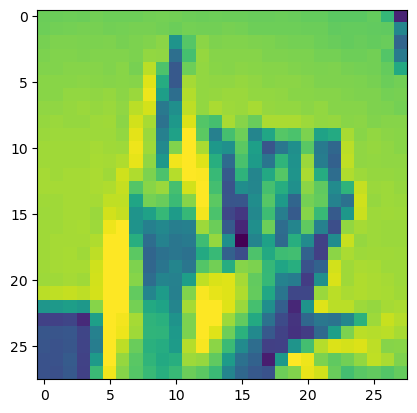

8


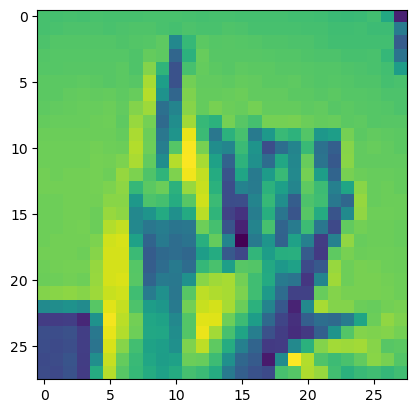

21


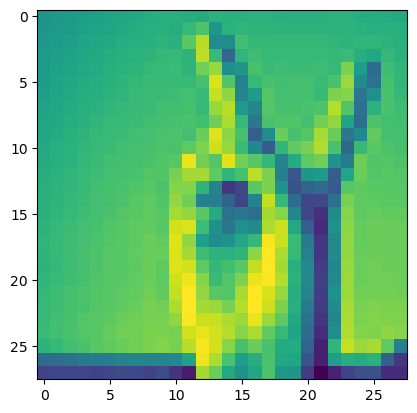

12


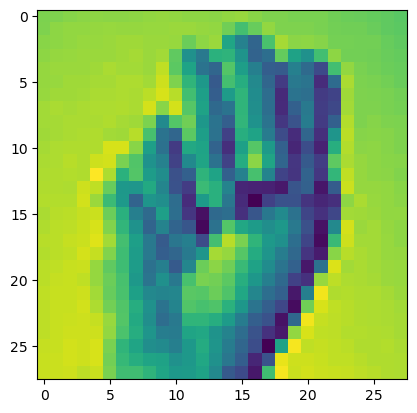

7


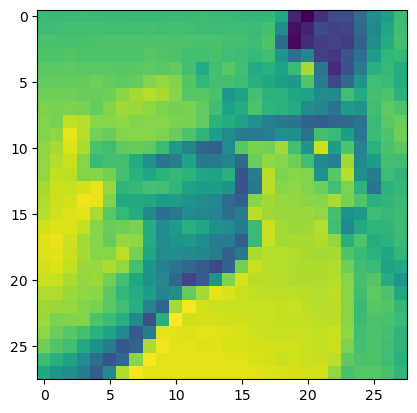

4


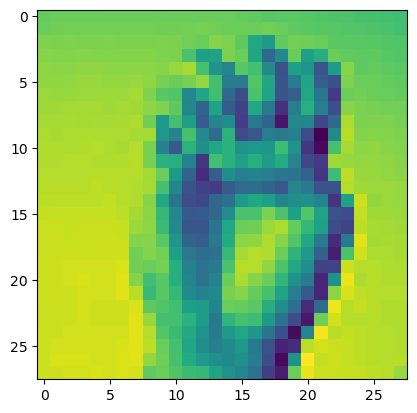

22


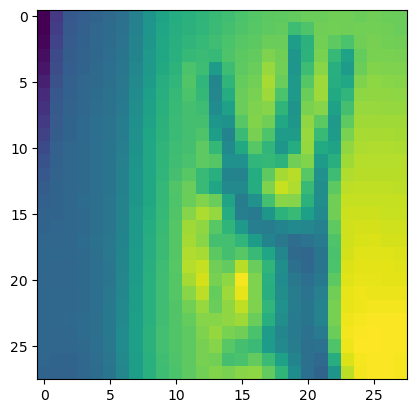

0


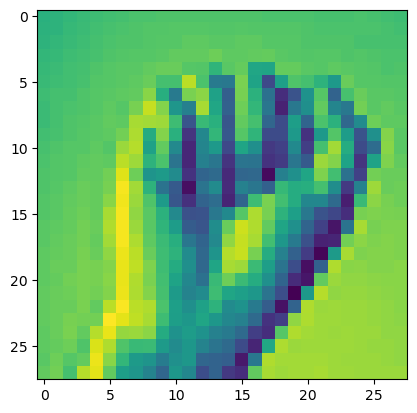

7


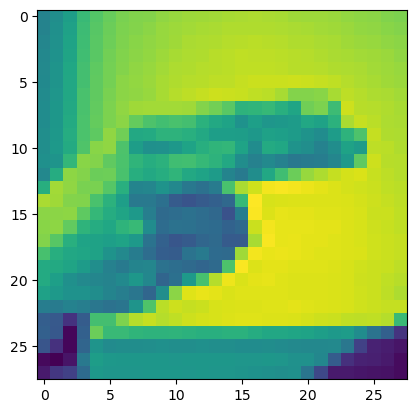

7


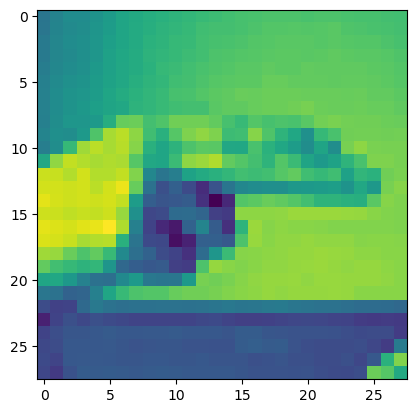

In [6]:
import matplotlib.pyplot as plt
for i in range(10):
    print(label[i])
    plt.imshow(test[i])
    plt.show()

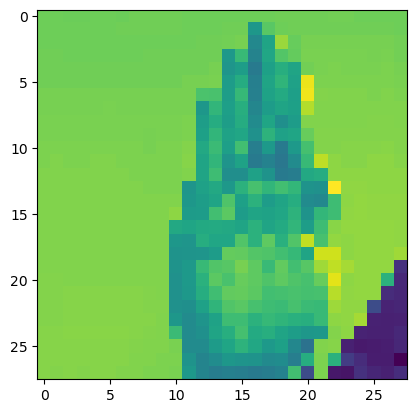

In [7]:
import numpy as np
img = plt.imread('hand.png')
img = img.reshape(1, 28, 28, 1)
plt.imshow(img[0])
plt.show()

In [8]:
model = keras.models.load_model("my_model", compile=True)

2022-12-20 10:52:55.944593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
prediction = model.predict(test)
prediction2 = model.predict(img)

1/1 [==============================] - 0s 17ms/step


In [10]:
prediction2

array([[1.1206670e-09, 9.9973375e-01, 8.8297800e-11, 2.0833404e-09,
        4.7858765e-07, 2.6575895e-04, 6.4709466e-10, 1.9651816e-13,
        2.1503257e-09, 5.3028540e-13, 1.4222486e-10, 8.5303459e-11,
        1.2119015e-08, 2.5815758e-10, 3.4787586e-09, 7.2272689e-13,
        4.6393152e-13, 2.5409658e-10, 1.6201777e-10, 1.9712346e-08,
        8.4584874e-12, 7.3227908e-09, 6.0905001e-09, 4.2027173e-10]],
      dtype=float32)

In [17]:
pred1 = np.argmax(prediction, axis = 1)
for i in range(len(label)):
    print('Prediction:',letters[pred1[i]],'Actual',letters[label[i]])
print('\n')
pred2 = np.argmax(prediction2, axis = 1)
print(letters[pred2[0]])

Prediction: I Actual I
Prediction: I Actual I
Prediction: V Actual W
Prediction: M Actual N
Prediction: H Actual H
Prediction: E Actual E
Prediction: W Actual X
Prediction: A Actual A
Prediction: H Actual H
Prediction: H Actual H


B


In [ ]:
def png_to_array(path):
    png = Image.open(path)
    png_array = asarray(png)

    return png_array

In [ ]:
def run_camera():
    # Create a VideoCapture object
    if os.name == 'posix': # Linux and Mac
        cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
    elif os.name == 'nt': # Windows
        cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

    # Set the camera resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    info = """Press space to read a new letter,"""
    info2 = """c to clear text, q to quit"""
    text = ""

    # Loop until the user hits the 'q' key
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # Check if the frame was successfully read
        if not ret:
            break

        # Wait for the user to hit a key
        key = cv2.waitKey(1)
        if key == ord('q'):
            break

        if key == ord('c'):
            text = ""


        # If the user pressed 'L', put some text_RF on the frame
        if key == ord(' '):
            box = frame[80:276, 50:246]
            # resize the image to 28x28
            box = cv2.resize(box, (28, 28))
            # convert to grayscale
            box = cv2.cvtColor(box, cv2.COLOR_BGR2GRAY)
            # invert the colors
            #box = 255 - box
            cv2.imwrite("HandsignInterpreter/hand.png", box)

            #turn it to 1 long array
            box = box.reshape(1, 784)

            prediction = model.predict(box)
            letter = np.argmax(prediction, axis = 1)
            new_letter = letters[letter[0]]
            text += new_letter

        cv2.putText(frame, info, (20, 460), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 200, 100), 2)
        cv2.putText(frame, info2, (20, 440), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 200, 100), 2)
        cv2.putText(frame, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 0, 0), 2)
        cv2.rectangle(frame, (50, 80), (246, 276), (0, 255, 0), 2)

        # Show the frame
        cv2.imshow("Camera", frame)

    # Release the camera and destroy all windows
    cap.release()
    cv2.destroyAllWindows()